**Initialization**
W12 project - Find best MSE for Kaggle competition

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error, accuracy_score, accuracy_score, recall_score, precision_score
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
labelencoder = LabelEncoder()
sc = StandardScaler()
log = LogisticRegression(random_state = 0)
lr= LinearRegression()

**Load data** - Remember load data CSV put in Drive

In [ ]:
test = pd.read_csv("/Users/coraliaarguedasf/Documents/BootcampDataScience/Week12/Class70/test.csv")
train = pd.read_csv("/Users/coraliaarguedasf/Documents/BootcampDataScience/Week12/Class70/train.csv")

**ETL**

In [ ]:
test.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,Id
0,1,UPPER WEST SIDE (59-79),17 CONDO COOPS,2,1115,1506,,R9,"61 WEST 62ND STREET, 11L",,10023,0,0,0,-,-,0,16203
1,2,SOUNDVIEW,10 COOPS - ELEVATOR APARTMENTS,2,3659,1,,D4,"920 METCALF AVENUE, 14H",,10473,0,0,0,0,0,1967,24057
2,1,UPPER EAST SIDE (59-79),15 CONDOS - 2-10 UNIT RESIDENTIAL,,1386,1204,,,40 EAST 72ND STREET,,0,0,0,0,-,-,0,13182
3,4,LONG ISLAND CITY,28 COMMERCIAL CONDOS,4,429,1002,,R5,42-60 CRESCENT STREET,1B,11101,0,1,1,-,-,2014,66523
4,3,BUSHWICK,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,3432,1007,,R1,1008 DECATUR STREET,4B,11207,1,0,1,0,0,2014,32060


In [ ]:
train.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,Id
0,4,FLUSHING-NORTH,02 TWO FAMILY DWELLINGS,1,6359,4,,B1,13206 57 ROAD,,11355,2,0,2,1285,1762,2002,1050000,57110
1,5,NEW DORP-BEACH,02 TWO FAMILY DWELLINGS,1,4067,27,,B3,64 HETT AVENUE,,10306,2,0,2,5000,3450,1960,750000,80619
2,1,UPPER EAST SIDE (79-96),10 COOPS - ELEVATOR APARTMENTS,2,1582,46,,D4,"510 EAST 86TH STREET, 5A",,10028,0,0,0,-,-,1958,1075000,14307
3,5,ELTINGVILLE,01 ONE FAMILY DWELLINGS,1,5366,21,,A2,30 LISS STREET,,10312,1,0,1,4000,1056,1960,490000,77692
4,2,MOTT HAVEN/PORT MORRIS,27 FACTORIES,4,2340,28,,F4,2590 PARK AVENUE,,10451,0,1,1,50400,48952,1958,11000000,21755


In [ ]:
print("Test columns \n", test.columns)
print("\n Train columns \n",train.columns)

Test columns 
 Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'Id'],
      dtype='object')

 Train columns 
 Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE',
       'Id'],
      dtype='object')


In [ ]:
test.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT
count,29880.000000,29880.000000,29880.000000,29880.000000,29880.000000,29880.000000,29880.000000,29880.000000
mean,2.930020,4148.574866,391.563454,10705.043574,1.729451,0.110576,1.852477,1809.960274
std,1.330877,3573.390737,667.099887,1247.400658,12.486599,2.764970,12.907225,505.960652
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1270.000000,22.000000,10128.000000,0.000000,0.000000,0.000000,1920.000000
50%,3.000000,3165.000000,51.000000,11206.000000,1.000000,0.000000,1.000000,1940.000000
75%,4.000000,6115.000000,1002.000000,11356.000000,2.000000,0.000000,2.000000,1966.000000
max,5.000000,16315.000000,9099.000000,11694.000000,948.000000,436.000000,955.000000,2017.000000


In [ ]:
train.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,SALE PRICE
count,29879.000000,29879.00000,29879.000000,29879.000000,29879.000000,29879.000000,29879.000000,29879.000000,2.987900e+04
mean,2.949731,4154.66120,389.973761,10706.434988,1.726965,0.215770,1.954851,1810.254928,1.535604e+06
std,1.322724,3564.54753,674.578228,1280.599041,15.654717,13.611472,20.847285,505.539404,1.555293e+07
min,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00
25%,2.000000,1291.00000,21.000000,10301.000000,0.000000,0.000000,0.000000,1920.000000,3.700000e+05
50%,3.000000,3168.00000,50.000000,11207.000000,1.000000,0.000000,1.000000,1940.000000,6.250000e+05
75%,4.000000,6099.00000,1002.000000,11357.000000,1.000000,0.000000,2.000000,1966.000000,1.065000e+06
max,5.000000,16319.00000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2016.000000,2.210000e+09


In [ ]:
train['ADDRESS'].value_counts()

131-05 40TH   ROAD              112
429 KENT AVENUE                  87
131-03 40TH   ROAD               81
265 STATE STREET                 68
50 WEST STREET                   62
                               ... 
150 CENTRAL PARK SOUTH, 2601      1
477 FDR DRIVE, M405               1
3363 SEDGWICK AVENUE, 5D          1
2042 WEBSTER AVE                  1
142-03 OAK AVENUE                 1
Name: ADDRESS, Length: 25696, dtype: int64

In [ ]:
target = "SALE PRICE"
# feature set --> it cannot have the target 
X_train = train.drop(['ADDRESS','APARTMENT NUMBER','Id','SALE PRICE'],axis=1)
y_train=train[target]
X_test = test.drop(['ADDRESS','APARTMENT NUMBER','Id'],axis=1)


In [ ]:
numeric_features = X_train.describe().columns 
numeric_features

Index(['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'YEAR BUILT'],
      dtype='object')

In [ ]:
categorical_features = X_train.describe(exclude="number").columns
categorical_features

Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET'],
      dtype='object')

In [ ]:
# Create a transformer for numeric columns

numeric_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)

# Create Transformer for categorical data

categorical_transformer = Pipeline(
    steps=[
        ('one_hot', OneHotEncoder(handle_unknown='ignore')) # Ignore unseen categorical in transform step not seen in fit_transform
    ]
)

# Create a preprocessor transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Append regressor to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', LinearRegression())])

In [ ]:
clf.fit(X_train, y_train)
print(f"model score Train: {clf.score(X_train, y_train)}")

model score Train: 0.9836121336787749


In [ ]:
results=pd.DataFrame(test['Id'])
results=results.rename(columns={0:'Id'})
results['SALE PRICE']=clf.predict(X_test)
results

,Id,SALE PRICE
0,16203,1.285850e+06
1,24057,-3.947736e+05
2,13182,3.293281e+06
3,66523,2.606704e+07
4,32060,8.620058e+05
...,...,...
29875,62227,-2.166254e+05
29876,57890,9.464535e+05
29877,14654,2.714457e+06
29878,10172,6.764960e+05


In [ ]:
results[results['SALE PRICE']<0]

,Id,SALE PRICE
1,24057,-3.947736e+05
7,53918,-2.194692e+05
29,55529,-3.142209e+06
30,16761,-2.602878e+06
62,57520,-2.847156e+04
...,...,...
29859,73,-4.138904e+06
29862,39271,-9.194157e+05
29868,65007,-3.186780e+05
29874,55320,-2.793800e+05


**EDA**

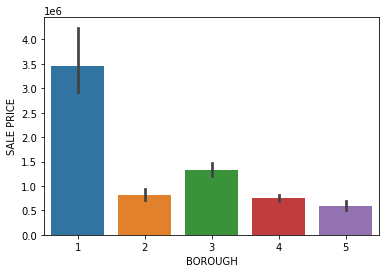

In [ ]:
# BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
sns.barplot(x='BOROUGH',
            y='SALE PRICE',
            data=train)

### *BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time. See the glossary linked to below.*

*   https://www1.nyc.gov/assets/finance/jump/hlpbldgcode.html  ***  Building Classification | City of New York \
*   https://www1.nyc.gov/assets/finance/downloads/pdf/07pdf/glossary_rsf071607.pdf  ***  Glossary of Terms for Property Sales Files



In [ ]:
train["LOT"].value_counts()

1       1718
20       362
12       353
23       344
40       340
        ... 
3669       1
1620       1
3653       1
4664       1
1727       1
Name: LOT, Length: 1829, dtype: int64

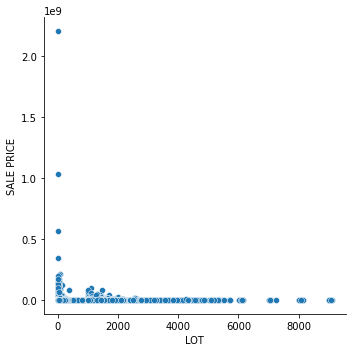

In [ ]:
# BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
sns.relplot(x='LOT',
            y='SALE PRICE',
            data=train)

In [ ]:
train["BUILDING CLASS AT PRESENT"].value_counts()

D4    5738
R4    4920
A1    2496
A5    2092
B2    1607
      ... 
HS       1
J1       1
I7       1
P6       1
F2       1
Name: BUILDING CLASS AT PRESENT, Length: 137, dtype: int64

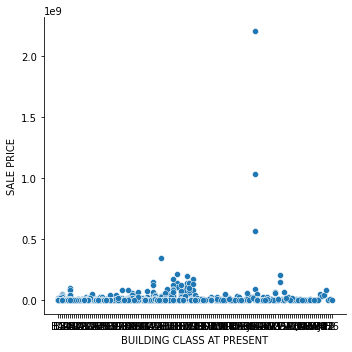

In [ ]:
sns.relplot(x='BUILDING CLASS AT PRESENT',
            y='SALE PRICE',
            data=train)